In [241]:
import pandas as pd
import matplotlib.pyplot as plt

In [242]:
data_df = pd.read_csv('./source/Dataset/cardio_data.csv')

In [243]:
#data_df.head()

In [244]:
#len(data_df)

In [245]:
#print(data_df.info())

Correcting the data type

In [246]:
data_df['date'] = pd.to_datetime(data_df['date'], format="%d-%m-%Y")
#data_df.dtypes

In [247]:
def show_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values for column '{column}': {unique_values}")

In [248]:
data_df['age_years'] = data_df['age'] / 365
data_df['age_years'] = data_df['age_years'].astype(int)
data_df.drop(columns=['age'], inplace=True)


data_df['bmi'] = data_df['weight'] / ((data_df['height'] / 100) **2)

In [249]:
#TO CHECK age_years for <20 and >60
data_df['age_years'].describe()


count    70000.000000
mean        52.840671
std          6.766774
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age_years, dtype: float64

In [250]:
def populates_agebinned_columns(category_age, df):
    for cat in category_age:
        df[f'age_binned_{cat}'] = 0
        df.loc[df['age_binned'] == cat, f'age_binned_{cat}'] = 1

    return df
  

#further categoried the age group
bin_age = [19, 29, 39, 49, 59, 69]
category_age = ['20s', '30s', '40s', '50s', '60s']
data_df['age_binned'] = pd.cut(data_df['age_years'], bins=bin_age, labels=category_age)
#df_drug = df_drug.drop(['Age'], axis = 1)

data_df = populates_agebinned_columns(category_age, data_df)
data_df.drop(columns=['age_years','age_binned'], axis=1, inplace=True)


In [251]:
#Drop it first, to change the top codes!!!
data_df.columns
#data_df.drop(columns=['age_binned_<20s','age_binned_>60s'], inplace=True)


Index(['date', 'country', 'id', 'active', 'alco', 'ap_hi', 'ap_lo',
       'cholesterol', 'gender', 'gluc', 'height', 'occupation', 'smoke',
       'weight', 'disease', 'bmi', 'age_binned_20s', 'age_binned_30s',
       'age_binned_40s', 'age_binned_50s', 'age_binned_60s'],
      dtype='object')

In [252]:
#Further binning Blood Pressure
#data_df.ap_hi.describe()

In [253]:
def populate_bplevels_columns(df):

    #x = 0
    for x in range(len(df)):
        #print(df.ap_hi[x])

        if df.ap_hi[x] < 120 and df.ap_lo[x] < 80:
            df.loc[x, 'bp_normal'] = 1
        elif df.ap_hi[x] < 129 and df.ap_lo[x] < 80:
            df.loc[x, 'bp_elevated'] = 1
        elif df.ap_hi[x] < 139 or df.ap_lo[x] < 89:
            df.loc[x, 'bp_hypertension1'] = 1
        else:
            df.loc[x, 'bp_hypertension2'] = 1
    
    return df

    #print(df.ap_hi[1])


#data_df.drop(columns=['bp_normal','bp_elevated','bp_hypertension1','bp_hypertension2'])        

data_df['bp_normal'] = 0
data_df['bp_elevated'] = 0
data_df['bp_hypertension1'] = 0
data_df['bp_hypertension2'] = 0


data_df = populate_bplevels_columns(data_df)

data_df.drop(columns=['ap_hi', 'ap_lo'], inplace=True)


In [254]:
bp_df = data_df[['bp_normal', 'bp_elevated', 'bp_hypertension1', 'bp_hypertension2']]

show_unique_values(bp_df)

Unique values for column 'bp_normal': [0 1]
Unique values for column 'bp_elevated': [0 1]
Unique values for column 'bp_hypertension1': [1 0]
Unique values for column 'bp_hypertension2': [0 1]


In [255]:
#data_df = data_df[data_df['bmi']< 100]

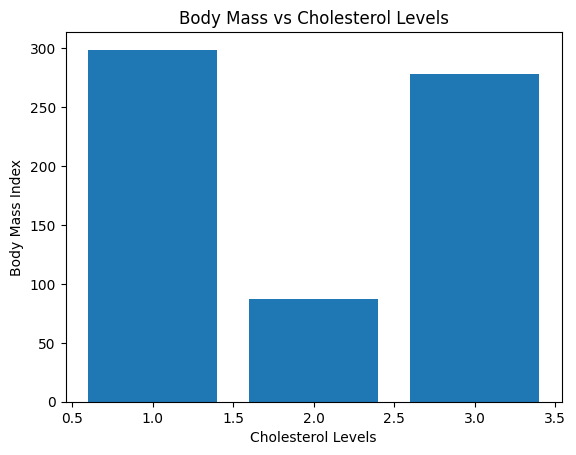

In [256]:
cholesterol_levels = data_df['cholesterol']
bmi_values = data_df['bmi']

bars = plt.bar(cholesterol_levels, bmi_values, label="bmi")
plt.xlabel('Cholesterol Levels')
plt.ylabel('Body Mass Index')
plt.title("Body Mass vs Cholesterol Levels")

plt.show()

Hypothesis for gender: Male usually are taller and weights  more than Female. Thus, assumption is that Gender(1=F, 0=M)
Cholestrol level: 1=LOW, 2=MEDIUM, 3=HIGH

FINDINGS
The relationship between BMI (Body Mass Index) and cholesterol levels can vary based on various factors including genetics, diet, lifestyle, and overall health. While there's no direct correlation between BMI and cholesterol levels, it's possible for someone to have a high BMI but low cholesterol and vice versa.

In [257]:
# Create bar chart
#plt.bar(data_df.country, data_df.disease)

# Group by Country and sum occurrences of disease value 1
counts = data_df[data_df['disease'] == 1].groupby('occupation').size()
counts.sort_values(ascending=False)
# Plotting the bar chart
#counts.plot(kind='bar')

# Add labels and title
#plt.xlabel('Occupation')
#plt.ylabel('Disease Count')
#plt.title('Bar Chart Example')

# Adding country names as legends
#plt.legend(labels=counts.index, title='Occupation')

# Show the plot
#plt.show()

occupation
Accountant    4009
Nurse         3937
Architect     3932
Others        3911
Lawyer        3891
Teacher       3868
Chef          3823
Doctor        3808
Engineer      3800
dtype: int64

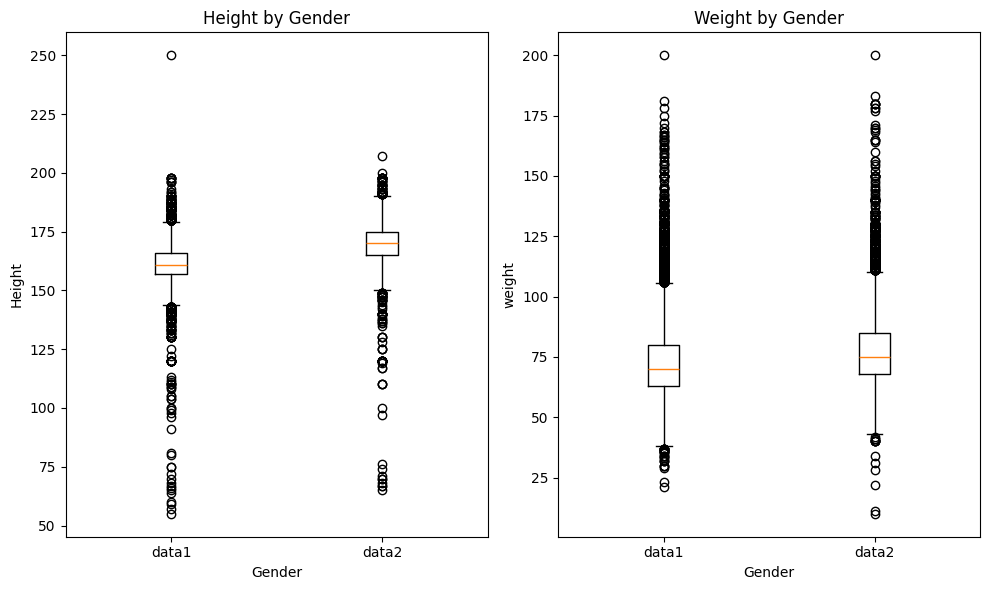

In [258]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.boxplot([data_df[data_df['gender'] == 1]['height'], data_df[data_df['gender'] == 2]['height']], labels=['data1','data2'])
plt.xlabel('Gender')
plt.ylabel('Height')
plt.title("Height by Gender")

plt.subplot(1, 2, 2)
plt.boxplot([data_df[data_df['gender'] == 1]['weight'], data_df[data_df['gender'] == 2]['weight']], labels=['data1','data2'])
plt.xlabel('Gender')
plt.ylabel('weight')
plt.title("Weight by Gender")

plt.tight_layout()
plt.show()

To the fact that typically Males are heavier and taller than Females.Thus 'data1' is deemed to be females and 'data2' is males.

Another point is, there are many outliers shown above. That may result positive or negative impact to the ML model which shall be addressed later.

In [259]:
#define the gender
data_df['gender_male'] = 0
data_df['gender_female'] = 0

data_df.loc[data_df['gender'] == 1, 'gender_female'] = 1
data_df.loc[data_df['gender'] == 2, 'gender_male'] = 1

data_df.drop('gender', axis=1, inplace=True)


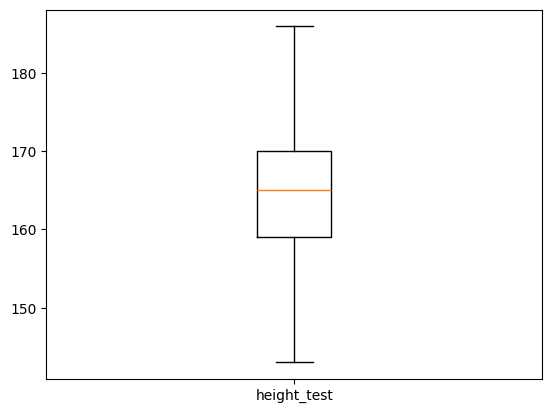

In [279]:
#Try to workout with the outliers
q1 = data_df['height'].quantile(0.25)
q3 = data_df['height'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for acceptable values
threshold_lower = q1 - 1.5 * iqr
threshold_upper = q3 + 1.5 * iqr

# Identify outliers in the 'height' column
outliers = data_df[(data_df['height'] < threshold_lower) | (data_df['height'] > threshold_upper)]

# Exclude outliers from the dataset, but keep those within the threshold range
filtered_data1 = data_df[(data_df['height'] >= threshold_lower) & (data_df['height'] <= threshold_upper)]

plt.boxplot(filtered_data['height'], labels=['height_test'])
plt.show()

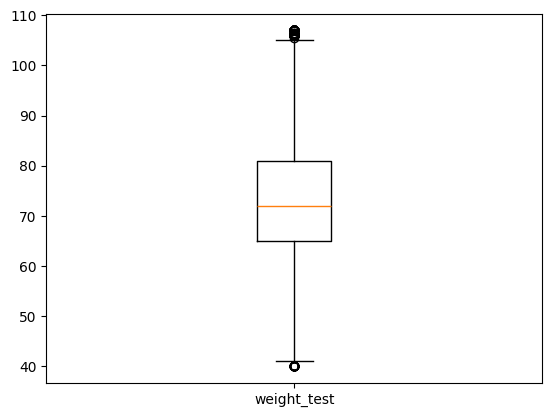

In [280]:
#Try to workout with the outliers
q1 = data_df['weight'].quantile(0.25)
q3 = data_df['weight'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for acceptable values
threshold_lower = q1 - 1.5 * iqr
threshold_upper = q3 + 1.5 * iqr

# Identify outliers in the 'height' column
outliers = data_df[(data_df['weight'] < threshold_lower) | (data_df['weight'] > threshold_upper)]

# Exclude outliers from the dataset, but keep those within the threshold range
filtered_data = data_df[(data_df['weight'] >= threshold_lower) & (data_df['weight'] <= threshold_upper)]

plt.boxplot(filtered_data['weight'], labels=['weight_test'])
plt.show()

In [281]:
filtered_data

,date,id,active,alco,height,smoke,weight,disease,bmi,age_binned_20s,...,gender_male,gender_female,cholesterol_high,cholesterol_medium,cholesterol_low,gluc_high,gluc_medium,gluc_low,country_num,occupation_num
0,2021-05-03,0,1,0,168,0,62.0,0,21.967120,0,...,1,0,0,0,1,0,0,1,0,0
1,2021-08-05,1,1,0,156,0,85.0,1,34.927679,0,...,0,1,1,0,0,0,0,1,1,1
2,2022-11-13,2,0,0,165,0,64.0,1,23.507805,0,...,0,1,1,0,0,0,0,1,0,2
3,2018-10-31,3,1,0,169,0,82.0,1,28.710479,0,...,1,0,0,0,1,0,0,1,2,3
4,2020-09-25,4,0,0,156,0,56.0,0,23.011177,0,...,0,1,0,0,1,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2018-04-05,99992,1,0,165,0,80.0,1,29.384757,0,...,0,1,0,0,1,0,0,1,2,3
69995,2018-04-03,99993,1,0,168,1,76.0,0,26.927438,0,...,1,0,0,0,1,0,0,1,2,7
69997,2022-08-25,99996,0,1,183,0,105.0,1,31.353579,0,...,1,0,1,0,0,0,0,1,1,1
69998,2020-07-13,99998,0,0,163,0,72.0,1,27.099251,0,...,0,1,0,0,1,0,1,0,2,1


In [260]:
#define the cholesterol leves
data_df['cholesterol_high'] = 0
data_df['cholesterol_medium'] = 0
data_df['cholesterol_low'] = 0

data_df.loc[data_df['cholesterol'] == 1, 'cholesterol_low'] = 1
data_df.loc[data_df['cholesterol'] == 2, 'cholesterol_medium'] = 1
data_df.loc[data_df['cholesterol'] == 3, 'cholesterol_high'] = 1

data_df.drop('cholesterol', axis=1, inplace=True)



In [261]:
#define the gluc leves
data_df['gluc_high'] = 0
data_df['gluc_medium'] = 0
data_df['gluc_low'] = 0

data_df.loc[data_df['gluc'] == 1, 'gluc_low'] = 1
data_df.loc[data_df['gluc'] == 2, 'gluc_medium'] = 1
data_df.loc[data_df['gluc'] == 3, 'gluc_high'] = 1

data_df.drop('gluc', axis=1, inplace=True)


In [262]:
country_mapping_dict = {'Indonesia': 0, 
                        'Malaysia': 1,
                        'Singapore' : 2,
                        'India' : 3}

# Map values in columnA using the mapping dictionary
data_df['country_num'] = data_df['country'].map(country_mapping_dict)

#data_df[['country', 'country_num']].drop_duplicates()
data_df.drop('country', axis=1, inplace=True)

In [263]:
#data_df.max()

In [264]:
data_df.occupation.unique()

occupation_mapping_dict = {'Architect' : 0, 
                           'Accountant' : 1,
                           'Chef' : 2, 
                           'Lawyer' : 3, 
                           'Teacher' : 4, 
                           'Nurse' : 5,
                           'Engineer' : 6, 
                           'Doctor' : 7, 
                           'Others' : 8}

# Map values in columnA using the mapping dictionary
data_df['occupation_num'] = data_df['occupation'].map(occupation_mapping_dict)

#data_df[['occupation', 'occupation_num']].drop_duplicates()
data_df.drop(columns=['occupation'], inplace=True)


In [265]:
#data_df['gluc'].unique()

data_df.corr()

#data_df['age_binned_>60s'].unique()

,date,id,active,alco,height,smoke,weight,disease,bmi,age_binned_20s,...,gender_male,gender_female,cholesterol_high,cholesterol_medium,cholesterol_low,gluc_high,gluc_medium,gluc_low,country_num,occupation_num
date,1.000000,-0.001225,0.000678,0.008741,0.000116,0.004024,-0.001464,-0.002015,-0.002383,0.005717,...,0.002018,-0.002018,-0.003266,0.004210,-0.000926,-0.008688,0.003230,0.004080,-0.003885,0.004407
id,-0.001225,1.000000,0.003755,0.001210,-0.003038,-0.003699,-0.001830,0.003799,-0.001377,-0.004939,...,0.003502,-0.003502,0.005819,0.001275,-0.005290,0.001490,0.002370,-0.002844,0.001960,0.000910
active,0.000678,0.003755,1.000000,0.025476,-0.006570,0.025858,-0.016867,-0.035653,-0.014261,0.003235,...,0.005866,-0.005866,0.013081,-0.004695,-0.005911,-0.002397,-0.009932,0.009061,-0.001662,-0.001038
alco,0.008741,0.001210,0.025476,1.000000,0.094419,0.340094,0.067113,-0.007330,0.014394,-0.001561,...,0.170966,-0.170966,0.016915,0.039402,-0.043610,-0.003499,0.031648,-0.020606,0.001951,-0.000058
height,0.000116,-0.003038,-0.006570,0.094419,1.000000,0.187989,0.290968,-0.010821,-0.290642,0.004232,...,0.499033,-0.499033,-0.041043,-0.023180,0.048532,-0.013980,-0.012309,0.019400,-0.001730,0.001760
smoke,0.004024,-0.003699,0.025858,0.340094,0.187989,1.000000,0.067780,-0.015486,-0.027215,-0.002035,...,0.338135,-0.338135,-0.002185,0.024587,-0.017839,-0.013074,0.016082,-0.002087,0.003871,0.000038
weight,-0.001464,-0.001830,-0.016867,0.067113,0.290968,0.067780,1.000000,0.181660,0.762009,-0.001913,...,0.155406,-0.155406,0.114499,0.067939,-0.137981,0.068318,0.095067,-0.120407,0.001012,-0.003489
disease,-0.002015,0.003799,-0.035653,-0.007330,-0.010821,-0.015486,0.181660,1.000000,0.165632,-0.006543,...,0.008109,-0.008109,0.191798,0.081442,-0.205536,0.070241,0.052841,-0.090876,-0.000985,-0.003521
bmi,-0.002383,-0.001377,-0.014261,0.014394,-0.290642,-0.027215,0.762009,0.165632,1.000000,-0.003592,...,-0.096529,0.096529,0.120016,0.066597,-0.140979,0.066370,0.087070,-0.113098,0.003436,-0.003113
age_binned_20s,0.005717,-0.004939,0.003235,-0.001561,0.004232,-0.002035,-0.001913,-0.006543,-0.003592,1.000000,...,-0.000223,0.000223,-0.002363,-0.002602,0.003796,-0.001880,-0.001853,0.002753,0.000979,0.006777


Text(0.5, 1.0, 'Correlation Heatmap')

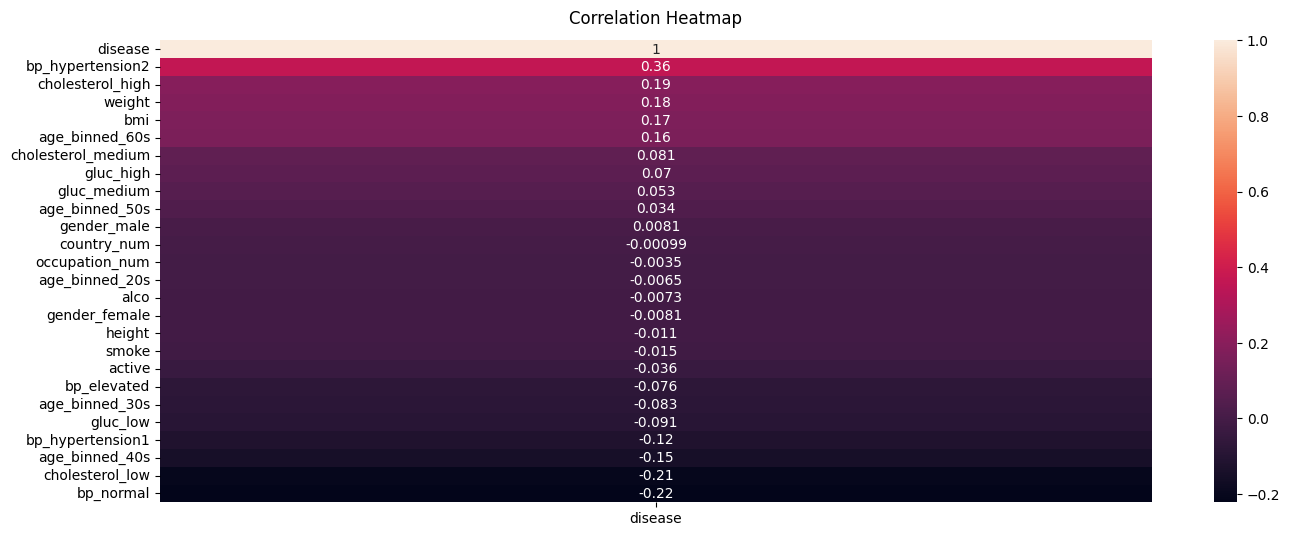

In [266]:
import seaborn as sns

iddate_removed_df = data_df.drop(columns=['id','date'])

plt.figure(figsize=(16, 6))

#heatmap = sns.heatmap(data_df.corr()[['gluc_low', 'gluc_medium', 'gluc_high']],
heatmap = sns.heatmap(iddate_removed_df.corr()[['disease']].sort_values(by=['disease'],ascending=False),
                      annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


In [267]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [268]:
# Feature Selection
selected_df = iddate_removed_df
#selected_df = iddate_removed_df[iddate_removed_df['age_binned_40s'] == 1]
#selected_df = iddate_removed_df.loc[(iddate_removed_df['age_binned_30s']==1) & (iddate_removed_df['country_num'] == 3)]

X = selected_df.drop(columns=['disease'], axis = 1)
y = selected_df['disease']

In [269]:
#X.head(3)

In [270]:
X

,active,alco,height,smoke,weight,bmi,age_binned_20s,age_binned_30s,age_binned_40s,age_binned_50s,...,gender_male,gender_female,cholesterol_high,cholesterol_medium,cholesterol_low,gluc_high,gluc_medium,gluc_low,country_num,occupation_num
0,1,0,168,0,62.0,21.967120,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,1,0,156,0,85.0,34.927679,0,0,0,1,...,0,1,1,0,0,0,0,1,1,1
2,0,0,165,0,64.0,23.507805,0,0,0,1,...,0,1,1,0,0,0,0,1,0,2
3,1,0,169,0,82.0,28.710479,0,0,1,0,...,1,0,0,0,1,0,0,1,2,3
4,0,0,156,0,56.0,23.011177,0,0,1,0,...,0,1,0,0,1,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1,0,168,1,76.0,26.927438,0,0,0,1,...,1,0,0,0,1,0,0,1,2,7
69996,1,0,158,0,126.0,50.472681,0,0,0,0,...,0,1,0,1,0,0,1,0,1,1
69997,0,1,183,0,105.0,31.353579,0,0,0,1,...,1,0,1,0,0,0,0,1,1,1
69998,0,0,163,0,72.0,27.099251,0,0,0,0,...,0,1,0,0,1,0,1,0,2,1


In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [272]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', max_iter=5000)

lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

accuracy = metrics.accuracy_score(predictions, y_test)

print("The Accuracy of the logistic regression model is: ", accuracy*100, "%")

The Accuracy of the logistic regression model is:  70.3047619047619 %


In [273]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

acc = metrics.accuracy_score(pred, y_test)

print("The accuracy of the KNN model is: ", acc*100, "%")

The accuracy of the KNN model is:  60.05714285714285 %


In [274]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [275]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73     10506
           1       0.75      0.62      0.67     10494

    accuracy                           0.70     21000
   macro avg       0.71      0.70      0.70     21000
weighted avg       0.71      0.70      0.70     21000

[[8295 2211]
 [4025 6469]]


In [276]:
data_df

,date,id,active,alco,height,smoke,weight,disease,bmi,age_binned_20s,...,gender_male,gender_female,cholesterol_high,cholesterol_medium,cholesterol_low,gluc_high,gluc_medium,gluc_low,country_num,occupation_num
0,2021-05-03,0,1,0,168,0,62.0,0,21.967120,0,...,1,0,0,0,1,0,0,1,0,0
1,2021-08-05,1,1,0,156,0,85.0,1,34.927679,0,...,0,1,1,0,0,0,0,1,1,1
2,2022-11-13,2,0,0,165,0,64.0,1,23.507805,0,...,0,1,1,0,0,0,0,1,0,2
3,2018-10-31,3,1,0,169,0,82.0,1,28.710479,0,...,1,0,0,0,1,0,0,1,2,3
4,2020-09-25,4,0,0,156,0,56.0,0,23.011177,0,...,0,1,0,0,1,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2018-04-03,99993,1,0,168,1,76.0,0,26.927438,0,...,1,0,0,0,1,0,0,1,2,7
69996,2022-01-12,99995,1,0,158,0,126.0,1,50.472681,0,...,0,1,0,1,0,0,1,0,1,1
69997,2022-08-25,99996,0,1,183,0,105.0,1,31.353579,0,...,1,0,1,0,0,0,0,1,1,1
69998,2020-07-13,99998,0,0,163,0,72.0,1,27.099251,0,...,0,1,0,0,1,0,1,0,2,1


In [277]:
#data_df[data_df['bmi'] > 200]